In [126]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
import pandas as pd
import pulp
from datetime import datetime
import numpy_financial as npf
import cvxpy as cp

# Assignment 3 Problems

In [ ]:
# Question 1
npv = [200, 150, 150, 220, 180, 160]       # in thousands
year_1 = [-100, -80, -50, -60, -90, -80]   # in thousands
year_2 = [-60, -70, -60, -90, -70, -90]    # in thousands

budget_1 = 250  # Budget for Year 1 (in thousands)
budget_2 = 250  # Budget for Year 2 (in thousands)

# Create LP problem (maximize NPV)
model = pulp.LpProblem("Project_Selection", pulp.LpMaximize)

# Decision variables: x[i] ∈ {0,1}
x = [pulp.LpVariable(f"x{i}", cat="Binary") for i in range(len(npv))]

# Objective function: Maximize total NPV
model += pulp.lpSum(npv[i] * x[i] for i in range(len(npv))), "Total_NPV"

# Year 1 budget constraint
model += pulp.lpSum(-year_1[i] * x[i] for i in range(len(year_1))) <= budget_1, "Year1_Budget"

# Year 2 budget constraint
model += pulp.lpSum(-year_2[i] * x[i] for i in range(len(year_2))) <= budget_2, "Year2_Budget"

# Solve
model.solve()

# Output results
print("Status:", pulp.LpStatus[model.status])
print("Selected Projects:")
for i, var in enumerate(x):
    print(f"  Project {i+1}: {'Selected' if var.value() == 1 else 'Not selected'}")
print("Total NPV:", pulp.value(model.objective), "thousand dollars")


Status: Optimal
Selected Projects:
  Project 1: Selected
  Project 2: Not selected
  Project 3: Not selected
  Project 4: Selected
  Project 5: Selected
  Project 6: Not selected
Total NPV: 600.0 thousand dollars


In [33]:
# Question 2
npv = [220,180,170,250,170,170]       # in thousands
year_1 = [-100,-80,-50,-60,-90,-80]   # in thousands
year_2 = [-60,-70,-60,-90,-70,-90]    # in thousands

budget_1 = 250  # Budget for Year 1 (in thousands)
budget_2 = 250  # Budget for Year 2 (in thousands)
interest = 0.10

# Create problem
model = pulp.LpProblem("Project_Selection_With_Carryover", pulp.LpMaximize)

# Binary decision variables
x = [pulp.LpVariable(f"x{i}", cat="Binary") for i in range(len(npv))]

# Objective: Maximize NPV
model += pulp.lpSum(npv[i] * x[i] for i in range(len(npv))), "Total_NPV"

# Constraint 1: Year 1 budget
model += pulp.lpSum(-year_1[i] * x[i] for i in range(len(year_1))) <= budget_1, "Year1_Budget"

# Constraint 2: Year 2 budget including 10% of unused Year 1
model += (
    pulp.lpSum(-year_2[i] * x[i] for i in range(len(year_2))) +
    interest * pulp.lpSum(-year_1[i] * x[i] for i in range(len(year_1)))
    <= budget_2 + interest * budget_1
), "Year2_Budget_With_Return"

# Solve
model.solve()

# Output results
print("Status:", pulp.LpStatus[model.status])
print("Selected Projects:")
for i, var in enumerate(x):
    print(f"  Project {i+1}: {'Selected' if var.value() == 1 else 'Not selected'}")
print("Total NPV:", pulp.value(model.objective), "thousand dollars")


Status: Optimal
Selected Projects:
  Project 1: Selected
  Project 2: Selected
  Project 3: Not selected
  Project 4: Selected
  Project 5: Not selected
  Project 6: Not selected
Total NPV: 650.0 thousand dollars


In [34]:
# Example Problem from Lectures
npv = [150,200,100,100,120,150,240]       # in thousands
year_1 = [-90,-80,-50,-20,-40,-80,-80]   # in thousands
year_2 = [-58,-80,-100,-64,-50,-20,-100]    # in thousands

budget_1 = 250  # Budget for Year 1 (in thousands)
budget_2 = 250  # Budget for Year 2 (in thousands)
interest = 0.10

# Create problem
model = pulp.LpProblem("Project_Selection_With_Carryover", pulp.LpMaximize)

# Binary decision variables
x = [pulp.LpVariable(f"x{i}", cat="Binary") for i in range(len(npv))]

# Objective: Maximize NPV
model += pulp.lpSum(npv[i] * x[i] for i in range(len(npv))), "Total_NPV"

# Constraint 1: Year 1 budget
model += pulp.lpSum(-year_1[i] * x[i] for i in range(len(year_1))) <= budget_1, "Year1_Budget"

# Constraint 2: Year 2 budget including 10% of unused Year 1
model += (
    pulp.lpSum(-year_2[i] * x[i] for i in range(len(year_2))) +
    interest * pulp.lpSum(-year_1[i] * x[i] for i in range(len(year_1)))
    <= budget_2 + interest * budget_1
), "Year2_Budget_With_Return"

# Solve
model.solve()

# Output results
print("Status:", pulp.LpStatus[model.status])
print("Selected Projects:")
for i, var in enumerate(x):
    print(f"  Project {i+1}: {'Selected' if var.value() == 1 else 'Not selected'}")
print("Total NPV:", pulp.value(model.objective), "thousand dollars")


Status: Optimal
Selected Projects:
  Project 1: Not selected
  Project 2: Not selected
  Project 3: Not selected
  Project 4: Selected
  Project 5: Selected
  Project 6: Selected
  Project 7: Selected
Total NPV: 610.0 thousand dollars


In [27]:
# Question 3 - Firm Evaluation

dividend = 1.5e6
growth = 0.03
discount = 0.05

value = dividend*(1+growth)/(discount-growth)
value/1e6

77.24999999999999

In [40]:
# Question 4
npv = [200,170,190,200,170,220]       # in thousands
year_1 = [-100,-80,-50,-60,-90,-80]   # in thousands
year_2 = [-60,-70,-60,-90,-70,-90]    # in thousands

budget_1 = 250  # Budget for Year 1 (in thousands)
budget_2 = 250  # Budget for Year 2 (in thousands)
interest = 0.10

# Create problem
model = pulp.LpProblem("Project_Selection_With_Carryover", pulp.LpMaximize)

# Binary decision variables
x = [pulp.LpVariable(f"x{i}", cat="Binary") for i in range(len(npv))]

# Objective: Maximize NPV
model += pulp.lpSum(npv[i] * x[i] for i in range(len(npv))), "Total_NPV"

# Constraint 1: Year 1 budget
model += pulp.lpSum(-year_1[i] * x[i] for i in range(len(year_1))) <= budget_1, "Year1_Budget"

# Constraint 2: Year 2 budget including 10% of unused Year 1
model += (
    pulp.lpSum(-year_2[i] * x[i] for i in range(len(year_2))) +
    interest * pulp.lpSum(-year_1[i] * x[i] for i in range(len(year_1)))
    <= budget_2 + interest * budget_1
), "Year2_Budget_With_Return"

# Solve
model.solve()

# Output results
print("Status:", pulp.LpStatus[model.status])
print("Selected Projects:")
for i, var in enumerate(x):
    print(f"  Project {i+1}: {'Selected' if var.value() == 1 else 'Not selected'}")
print("Total NPV:", pulp.value(model.objective), "thousand dollars")

# Compute total Year 1 cost for selected projects
year1_cost = sum(-year_1[i] * x[i].value() for i in range(len(year_1)))
print("Total Year 1 Cost:", year1_cost, "thousand dollars")

# Compute total Year 2 cost for selected projects
year2_cost = sum(-year_2[i] * x[i].value() for i in range(len(year_2))) + interest*year1_cost
print("Total Year 2 Cost:", year2_cost, "thousand dollars")


Status: Optimal
Selected Projects:
  Project 1: Selected
  Project 2: Not selected
  Project 3: Not selected
  Project 4: Selected
  Project 5: Not selected
  Project 6: Selected
Total NPV: 620.0 thousand dollars
Total Year 1 Cost: 240.0 thousand dollars
Total Year 2 Cost: 264.0 thousand dollars


In [ ]:
# Question 5
npv = [200,190,200,220,150,200]       # in thousands
year_1 = [-100,-80,-50,-60,-90,-80]   # in thousands
year_2 = [-60,-70,-60,-90,-70,-90]    # in thousands

budget_1 = 250  # Budget for Year 1 (in thousands)
budget_2 = 250  # Budget for Year 2 (in thousands)
interest = 0.10

# Create problem
model = pulp.LpProblem("Project_Selection_With_Carryover", pulp.LpMaximize)

# Binary decision variables
x = [pulp.LpVariable(f"x{i}", cat="Binary") for i in range(len(npv))]

# Objective: Maximize NPV
model += pulp.lpSum(npv[i] * x[i] for i in range(len(npv))), "Total_NPV"

# Constraint 1: Year 1 budget
model += pulp.lpSum(-year_1[i] * x[i] for i in range(len(year_1))) <= budget_1, "Year1_Budget"

# Constraint 2: Year 2 budget including 10% of unused Year 1
model += (
    pulp.lpSum(-year_2[i] * x[i] for i in range(len(year_2))) +
    interest * pulp.lpSum(-year_1[i] * x[i] for i in range(len(year_1)))
    <= budget_2 + interest * budget_1
), "Year2_Budget_With_Return"

# Solve
model.solve()

# Output results
print("Status:", pulp.LpStatus[model.status])
print("Selected Projects:")
for i, var in enumerate(x):
    print(f"  Project {i+1}: {'Selected' if var.value() == 1 else 'Not selected'}")
print("Total NPV:", pulp.value(model.objective), "thousand dollars")

# Compute total Year 1 cost for selected projects
year1_cost = sum(-year_1[i] * x[i].value() for i in range(len(year_1)))
print("Total Year 1 Cost:", year1_cost, "thousand dollars")

# Compute total Year 2 cost for selected projects
year2_cost = sum(-year_2[i] * x[i].value() for i in range(len(year_2))) + interest*year1_cost
print("Total Year 2 Cost:", year2_cost, "thousand dollars")


Status: Optimal
Selected Projects:
  Project 1: Selected
  Project 2: Not selected
  Project 3: Selected
  Project 4: Selected
  Project 5: Not selected
  Project 6: Not selected
Total NPV: 620.0 thousand dollars
Total Year 1 Cost: 210.0 thousand dollars
Total Year 2 Cost: 231.0 thousand dollars


: 

# Assigment 4 Problems

### Problem 1 and related

In [6]:
data1 = pd.read_excel("DataProblem1.xlsx", sheet_name=None)
data1["VZ Data"].head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,45.669998,46.549999,45.000000,45.270000,37.050316,71814700
1,2016-01-08,45.660000,45.740002,44.049999,44.869999,37.174633,83670000
2,2016-01-15,44.040001,46.330002,43.790001,45.869999,38.003132,108002500
3,2016-01-22,46.410000,49.490002,46.000000,49.009998,40.604607,123876300
4,2016-01-29,49.389999,51.020000,49.220001,50.430000,41.781082,119130300


In [80]:
close1 = data1["VZ Data"]['Close']
close2 = data1["T Data"]['Close']

# Simple returns
r1 = close1.pct_change().dropna()
r2 = close2.pct_change().dropna()

returns_df = pd.DataFrame({'Verizon': r1, 'ATT': r2}).dropna()
cov_matrix = returns_df.cov().values

In [116]:
import numpy as np
from scipy.optimize import minimize

def portfolio_variance(w1, cov_matrix):
    w = np.array([w1, 1 - w1])
    return w.T @ cov_matrix @ w

initial_guess = 0.5
bounds = [(0, 1)]

result = minimize(portfolio_variance, initial_guess, args=(cov_matrix,), bounds=bounds)

w1_opt = result.x[0]
w2_opt = 1 - w1_opt

total_capital = 1_000_000
investment1 = .4057 * total_capital
investment2 = .5943 * total_capital

print(f"Optimal Allocation:")
print(f"  Verizon: {w1_opt:.5%} → ${investment1:,.2f}")
print(f"  ATT: {w2_opt:.4%} → ${investment2:,.2f}")


Optimal Allocation:
  Verizon: 34.95461% → $405,700.00
  ATT: 65.0454% → $594,300.00


In [113]:
1-.4058

0.5942000000000001

In [117]:
# price on January 17, 2017
vz_price1 = 56.65
att_price1 = 41.11

# price on June 23, 2017
vz_price2 = 45.39
att_price2 = 37.95

shares1 = investment1/vz_price1
shares2 = investment2/att_price1

r1_vz = shares1*vz_price2
r2_att = shares2*att_price2

portfolio_value = r1_vz + r2_att
portfolio_value

873679.282428067

In [118]:
portfolio_value/total_capital - 1

-0.12632071757193308

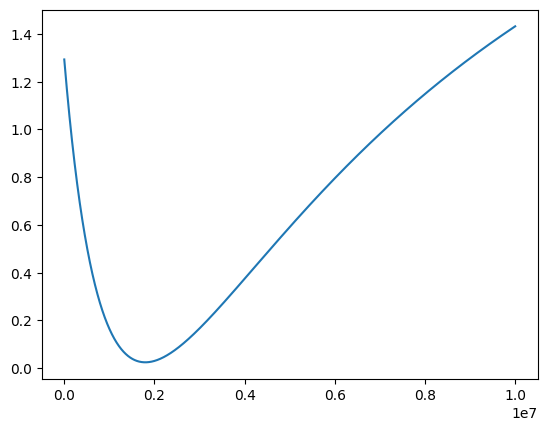

In [58]:
x = np.arange(1, 1e7, 1)
def variance(u):
    return (1.164e13 - 1.256e7*u + 3.56*u**2)/(3e6 + u)**2

def rate_return(u):
    return (2400000 + 1.2*u)/(3000000 + u)

y = variance(x)

plt.plot(x, y)

In [61]:
minimize_var = x[np.where(y == min(y))[0][0]]
rate_return(minimize_var)

0.9498525172132737

In [60]:
minimize_var

1797170.0

In [50]:
import numpy as np
from scipy.optimize import minimize_scalar

def variance(u):
    numerator = 1.164e13 - 1.256e7 * u + 3.56 * u**2
    denominator = (3e6 + u)**2
    return numerator / denominator

res = minimize_scalar(variance, bounds=(0, 1e8), method='bounded')
print("Optimal u:", res.x)
print("Minimum variance:", res.fun)


Optimal u: 1797169.795398273
Minimum variance: 0.024582104228121977


# Midterm Module 6

In [120]:
cash_flow_1 = [-100,30,30,30,30,30]
cash_flow_2 = [-150, 42,42,42,42,42]
discount = 0.05

npv_1 = npf.npv(values=cash_flow_1, rate=discount)
npv_2 = npf.npv(values=cash_flow_2, rate=discount)

print(f"NPV 1: {npv_1:0.03f}, NPV 2: {npv_2:0.03f}")

NPV 1: 29.884, NPV 2: 31.838


### Question 6

In [146]:
investment = 1e6

ap_start=141.04
am_start=1500.28
fb_start=131.74
go_start=1016.06
initial = np.array([ap_start, am_start, fb_start, go_start])

ap_end=204.41
am_end=1939.00
fb_end=197.2
go_end=1121.58
final = np.array([ap_end, am_end, fb_end, go_end])

r_ap=0.008771662
r_am=0.03385526
r_fb=0.012982714
r_go=0.015362285
r_avg = np.array([r_ap, r_am, r_fb, r_go])

s_ap=0.075290371
s_am=0.086245607
s_fb=0.06266357
s_go=0.06167237
var = np.array([s_ap**2,s_am**2,s_fb**2,s_go**2])

cov_ap_am=0.002156755
cov_ap_fb=0.001721943
cov_ap_go=0.001618178
cov_am_fb=0.002464478
cov_am_go=0.003620894
cov_fb_go=0.002012736
cov_matrix = np.array([
    [var[0], cov_ap_am, cov_ap_fb, cov_ap_go],
    [cov_ap_am, var[1], cov_am_fb, cov_am_go],
    [cov_ap_fb, cov_am_fb, var[2], cov_fb_go],
    [cov_ap_go, cov_am_go, cov_fb_go, var[3]]
])

target_return = np.mean(r_avg)

# --- Step 4: Define optimization variables ---
w = cp.Variable(4)

# --- Step 5: Define objective (minimize variance) ---
portfolio_variance = cp.quad_form(w, cov_matrix)

# --- Step 6: Constraints ---
constraints = [
    cp.sum(w) == 1,         # weights sum to 1
    r_avg @ w == target_return  # expected return constraint
]

# --- Step 7: Solve the optimization problem ---
prob = cp.Problem(cp.Minimize(portfolio_variance), constraints)
prob.solve()

# --- Step 8: Extract weights ---
weights = w.value
print("Optimal Weights:", weights)
print("Minimum Portfolio Variance:", prob.value)

Optimal Weights: [0.16538789 0.22921156 0.32278891 0.28261163]
Minimum Portfolio Variance: 0.0029584131321412385


In [147]:
allocation = weights*investment
shares = allocation/initial
portfolio_price = shares*final
market_value = np.sum(portfolio_price)
market_value

1331076.617781669

### Question 7

1000000.0

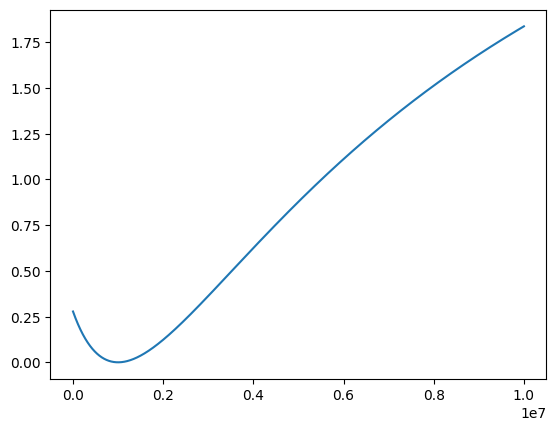

In [122]:
x = np.arange(1, 1e7, 1)
def variance(u):
    return (40*(u-1e6)**2)/(9*(u+4e6)**2)

# def rate_return(u):
#     return (2400000 + 1.2*u)/(3000000 + u)

y = variance(x)

plt.plot(x, y)
minimize_var = x[np.where(y == min(y))[0][0]]
minimize_var

### Question 8

In [144]:
investment = 1e6

ap_start=295.924713
fb_start=208.669998
ms_start=157.748581
initial = np.array([ap_start, fb_start, ms_start])

ap_end=204.41
fb_end=197.2
ms_end=121.58
final = np.array([ap_end, fb_end, ms_end])

r_ap=0.002750609
r_fb=0.001881764
r_ms=0.00197445
r_avg = np.array([r_ap, r_fb, r_ms])

s_ap=0.016514173
s_fb=0.01748264
s_ms=0.012528159
var = np.array([s_ap**2, s_fb**2, s_ms**2])


cov_ap_fb=0.000138217
cov_ap_ms=0.000129166
cov_fb_ms=0.000117024
cov_matrix = np.array([
    [var[0], cov_ap_fb, cov_ap_ms],
    [cov_ap_fb, var[1], cov_fb_ms],
    [cov_ap_ms, cov_fb_ms, var[2]]
])

target_return = np.mean(r_avg)

# --- Step 4: Define optimization variables ---
w = cp.Variable(3)

# --- Step 5: Define objective (minimize variance) ---
portfolio_variance = cp.quad_form(w, cov_matrix)

# --- Step 6: Constraints ---
constraints = [
    cp.sum(w) == 1,         # weights sum to 1
    w[0] == 2 * w[1]
]

# --- Step 7: Solve the optimization problem ---
prob = cp.Problem(cp.Minimize(portfolio_variance), constraints)
prob.solve()

# --- Step 8: Extract weights ---
weights = w.value
expected_return = np.dot(weights, r_avg)
print("Optimal Weights:", weights)
print("Expected Daily Return:", expected_return)
print("Minimum Portfolio Variance:", prob.value)

Optimal Weights: [0.17211196 0.08605598 0.74183206]
Expected Daily Return: 0.002100060061609563
Minimum Portfolio Variance: 0.0001487357073093652


### Question 10

In [148]:
# sharpe ratio of portfolio
rp = (market_value-investment)/investment
rf = 0.00208
sigma = np.sqrt(prob.value)

sharpe_ratio = (rp - rf)/sigma
sharpe_ratio

6.048699683742541

## Second Try

### Question 1

In [150]:
investment = 1e6

r_vz=-0.000153102
r_t=0.000289747
r_tmus=0.000787918
r_avg = np.array([r_vz, r_t, r_tmus])

s_vz=0.01162945
s_t=0.011620028
s_tmus=0.012889135
var = np.array([s_vz**2, s_t**2, s_tmus**2])


cov_vz_t=0.0000667
cov_vz_tmus=0.0000675
cov_t_tmus=0.000064
cov_matrix = np.array([
    [var[0], cov_vz_t, cov_vz_tmus],
    [cov_vz_t, var[1], cov_t_tmus],
    [cov_vz_tmus, cov_t_tmus, var[2]]
])

target_return = np.mean(r_avg)

# --- Step 4: Define optimization variables ---
w = cp.Variable(3)

# --- Step 5: Define objective (minimize variance) ---
portfolio_variance = cp.quad_form(w, cov_matrix)

# --- Step 6: Constraints ---
constraints = [
    cp.sum(w) == 1,         # weights sum to 1
    w[0] == 2 * w[2]
]

# --- Step 7: Solve the optimization problem ---
prob = cp.Problem(cp.Minimize(portfolio_variance), constraints)
prob.solve()

# --- Step 8: Extract weights ---
weights = w.value
expected_return = np.dot(weights, r_avg)
print("Optimal Weights:", weights)
print("Expected Daily Return:", expected_return)
print("Minimum Portfolio Variance:", prob.value)

Optimal Weights: [0.4120818 0.3818773 0.2060409]
Expected Daily Return: 0.00020990058804238327
Minimum Portfolio Variance: 9.223547540251605e-05


### Question 9

In [154]:
# Redefine function after environment reset

# Compute the variance of PV using the defined formula
def variance_pv(N=100):
    total_variance = 0
    for n in range(1, N + 1):
        k = n - 1
        term = k**2 * ((1 / 2**n) - (k**2 / 4**n))
        total_variance += term
    return total_variance

# Compute with 100 terms
variance_pv_val = variance_pv(1000)
variance_pv_val


1.8271604938271606